In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ Libraries imported successfully!
📦 Pandas version: 2.3.3
📦 NumPy version: 2.3.5


In [3]:
# Cell 2: Load All Datasets
# ============================================================================
print("📂 Loading datasets...\n")

# Load all CSV files
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

print("✅ All datasets loaded successfully!\n")
print("="*70)
print("📊 DATASET SIZES")
print("="*70)
print(f"{'Dataset':<30} {'Rows':<15} {'Columns':<10}")
print("-"*70)
print(f"{'Customers':<30} {len(customers):>10,} {customers.shape[1]:>10}")
print(f"{'Orders':<30} {len(orders):>10,} {orders.shape[1]:>10}")
print(f"{'Order Items':<30} {len(order_items):>10,} {order_items.shape[1]:>10}")
print(f"{'Products':<30} {len(products):>10,} {products.shape[1]:>10}")
print(f"{'Sellers':<30} {len(sellers):>10,} {sellers.shape[1]:>10}")
print(f"{'Payments':<30} {len(payments):>10,} {payments.shape[1]:>10}")
print(f"{'Reviews':<30} {len(reviews):>10,} {reviews.shape[1]:>10}")
print(f"{'Geolocation':<30} {len(geolocation):>10,} {geolocation.shape[1]:>10}")
print(f"{'Category Translation':<30} {len(category_translation):>10,} {category_translation.shape[1]:>10}")
print("="*70)

📂 Loading datasets...

✅ All datasets loaded successfully!

📊 DATASET SIZES
Dataset                        Rows            Columns   
----------------------------------------------------------------------
Customers                          99,441          5
Orders                             99,441          8
Order Items                       112,650          7
Products                           32,951          9
Sellers                             3,095          4
Payments                          103,886          5
Reviews                            99,224          7
Geolocation                     1,000,163          5
Category Translation                   71          2


In [4]:
# Cell 3: Explore Orders Dataset (Most Important)
# ============================================================================
print("="*70)
print("📦 ORDERS DATASET - DETAILED EXPLORATION")
print("="*70)

print("\n🔍 First 5 rows:")
display(orders.head())

print("\n📋 Column Names:")
print(orders.columns.tolist())

print("\n📊 Data Types:")
print(orders.dtypes)

print("\n📏 Dataset Shape:")
print(f"Rows: {orders.shape[0]:,}")
print(f"Columns: {orders.shape[1]}")

print("\n❓ Missing Values:")
missing = orders.isnull().sum()
missing_pct = (missing / len(orders)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

print("\n📈 Order Status Distribution:")
print(orders['order_status'].value_counts())
print(f"\nDelivered orders: {(orders['order_status'] == 'delivered').sum():,} ({(orders['order_status'] == 'delivered').sum() / len(orders) * 100:.1f}%)")

📦 ORDERS DATASET - DETAILED EXPLORATION

🔍 First 5 rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



📋 Column Names:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

📊 Data Types:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

📏 Dataset Shape:
Rows: 99,441
Columns: 8

❓ Missing Values:
                               Missing Count  Percentage
order_delivered_customer_date           2965        2.98
order_delivered_carrier_date            1783        1.79
order_approved_at                        160        0.16

📈 Order Status Distribution:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
proces

In [5]:
# Cell 4: Explore Customers Dataset
# ============================================================================
print("="*70)
print("👥 CUSTOMERS DATASET")
print("="*70)

print("\n🔍 First 5 rows:")
display(customers.head())

print("\n📊 Basic Info:")
print(f"Total unique customers: {customers['customer_id'].nunique():,}")
print(f"Total unique zip codes: {customers['customer_zip_code_prefix'].nunique():,}")
print(f"Total unique cities: {customers['customer_city'].nunique():,}")
print(f"Total unique states: {customers['customer_state'].nunique():,}")

print("\n🗺️ Top 10 States by Customer Count:")
print(customers['customer_state'].value_counts().head(10))

print("\n🏙️ Top 10 Cities by Customer Count:")
print(customers['customer_city'].value_counts().head(10))

👥 CUSTOMERS DATASET

🔍 First 5 rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



📊 Basic Info:
Total unique customers: 99,441
Total unique zip codes: 14,994
Total unique cities: 4,119
Total unique states: 27

🗺️ Top 10 States by Customer Count:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

🏙️ Top 10 Cities by Customer Count:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


In [6]:
# Cell 5: Explore Order Items Dataset
# ============================================================================
print("="*70)
print("🛒 ORDER ITEMS DATASET")
print("="*70)

print("\n🔍 First 5 rows:")
display(order_items.head())

print("\n📊 Basic Statistics:")
print(order_items.describe())

print("\n📦 Order Items Summary:")
print(f"Total order items: {len(order_items):,}")
print(f"Unique orders: {order_items['order_id'].nunique():,}")
print(f"Unique products: {order_items['product_id'].nunique():,}")
print(f"Unique sellers: {order_items['seller_id'].nunique():,}")
print(f"Average items per order: {len(order_items) / order_items['order_id'].nunique():.2f}")

print("\n💰 Price Statistics:")
print(f"Average item price: R$ {order_items['price'].mean():.2f}")
print(f"Median item price: R$ {order_items['price'].median():.2f}")
print(f"Min item price: R$ {order_items['price'].min():.2f}")
print(f"Max item price: R$ {order_items['price'].max():.2f}")

print("\n🚚 Freight Statistics:")
print(f"Average freight: R$ {order_items['freight_value'].mean():.2f}")
print(f"Median freight: R$ {order_items['freight_value'].median():.2f}")

🛒 ORDER ITEMS DATASET

🔍 First 5 rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



📊 Basic Statistics:
       order_item_id     price  freight_value
count      112650.00 112650.00      112650.00
mean            1.20    120.65          19.99
std             0.71    183.63          15.81
min             1.00      0.85           0.00
25%             1.00     39.90          13.08
50%             1.00     74.99          16.26
75%             1.00    134.90          21.15
max            21.00   6735.00         409.68

📦 Order Items Summary:
Total order items: 112,650
Unique orders: 98,666
Unique products: 32,951
Unique sellers: 3,095
Average items per order: 1.14

💰 Price Statistics:
Average item price: R$ 120.65
Median item price: R$ 74.99
Min item price: R$ 0.85
Max item price: R$ 6735.00

🚚 Freight Statistics:
Average freight: R$ 19.99
Median freight: R$ 16.26


In [7]:
# Cell 5: Explore Order Items Dataset
# ============================================================================
print("="*70)
print("🛒 ORDER ITEMS DATASET")
print("="*70)

print("\n🔍 First 5 rows:")
display(order_items.head())

print("\n📊 Basic Statistics:")
print(order_items.describe())

print("\n📦 Order Items Summary:")
print(f"Total order items: {len(order_items):,}")
print(f"Unique orders: {order_items['order_id'].nunique():,}")
print(f"Unique products: {order_items['product_id'].nunique():,}")
print(f"Unique sellers: {order_items['seller_id'].nunique():,}")
print(f"Average items per order: {len(order_items) / order_items['order_id'].nunique():.2f}")

print("\n💰 Price Statistics:")
print(f"Average item price: R$ {order_items['price'].mean():.2f}")
print(f"Median item price: R$ {order_items['price'].median():.2f}")
print(f"Min item price: R$ {order_items['price'].min():.2f}")
print(f"Max item price: R$ {order_items['price'].max():.2f}")

print("\n🚚 Freight Statistics:")
print(f"Average freight: R$ {order_items['freight_value'].mean():.2f}")
print(f"Median freight: R$ {order_items['freight_value'].median():.2f}")

🛒 ORDER ITEMS DATASET

🔍 First 5 rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



📊 Basic Statistics:
       order_item_id     price  freight_value
count      112650.00 112650.00      112650.00
mean            1.20    120.65          19.99
std             0.71    183.63          15.81
min             1.00      0.85           0.00
25%             1.00     39.90          13.08
50%             1.00     74.99          16.26
75%             1.00    134.90          21.15
max            21.00   6735.00         409.68

📦 Order Items Summary:
Total order items: 112,650
Unique orders: 98,666
Unique products: 32,951
Unique sellers: 3,095
Average items per order: 1.14

💰 Price Statistics:
Average item price: R$ 120.65
Median item price: R$ 74.99
Min item price: R$ 0.85
Max item price: R$ 6735.00

🚚 Freight Statistics:
Average freight: R$ 19.99
Median freight: R$ 16.26


In [8]:
# Cell 5: Explore Order Items Dataset
# ============================================================================
print("="*70)
print("🛒 ORDER ITEMS DATASET")
print("="*70)

print("\n🔍 First 5 rows:")
display(order_items.head())

print("\n📊 Basic Statistics:")
print(order_items.describe())

print("\n📦 Order Items Summary:")
print(f"Total order items: {len(order_items):,}")
print(f"Unique orders: {order_items['order_id'].nunique():,}")
print(f"Unique products: {order_items['product_id'].nunique():,}")
print(f"Unique sellers: {order_items['seller_id'].nunique():,}")
print(f"Average items per order: {len(order_items) / order_items['order_id'].nunique():.2f}")

print("\n💰 Price Statistics:")
print(f"Average item price: R$ {order_items['price'].mean():.2f}")
print(f"Median item price: R$ {order_items['price'].median():.2f}")
print(f"Min item price: R$ {order_items['price'].min():.2f}")
print(f"Max item price: R$ {order_items['price'].max():.2f}")

print("\n🚚 Freight Statistics:")
print(f"Average freight: R$ {order_items['freight_value'].mean():.2f}")
print(f"Median freight: R$ {order_items['freight_value'].median():.2f}")

🛒 ORDER ITEMS DATASET

🔍 First 5 rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



📊 Basic Statistics:
       order_item_id     price  freight_value
count      112650.00 112650.00      112650.00
mean            1.20    120.65          19.99
std             0.71    183.63          15.81
min             1.00      0.85           0.00
25%             1.00     39.90          13.08
50%             1.00     74.99          16.26
75%             1.00    134.90          21.15
max            21.00   6735.00         409.68

📦 Order Items Summary:
Total order items: 112,650
Unique orders: 98,666
Unique products: 32,951
Unique sellers: 3,095
Average items per order: 1.14

💰 Price Statistics:
Average item price: R$ 120.65
Median item price: R$ 74.99
Min item price: R$ 0.85
Max item price: R$ 6735.00

🚚 Freight Statistics:
Average freight: R$ 19.99
Median freight: R$ 16.26


In [9]:
# Cell 6: Explore Products Dataset
# ============================================================================
print("="*70)
print("📦 PRODUCTS DATASET")
print("="*70)

print("\n🔍 First 5 rows:")
display(products.head())

print("\n📊 Product Categories:")
print(f"Total unique products: {products['product_id'].nunique():,}")
print(f"Total unique categories: {products['product_category_name'].nunique():,}")

print("\n🏆 Top 10 Product Categories:")
print(products['product_category_name'].value_counts().head(10))

print("\n📏 Product Dimensions Statistics:")
print(products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].describe())

📦 PRODUCTS DATASET

🔍 First 5 rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00



📊 Product Categories:
Total unique products: 32,951
Total unique categories: 73

🏆 Top 10 Product Categories:
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64

📏 Product Dimensions Statistics:
       product_weight_g  product_length_cm  product_height_cm  \
count          32949.00           32949.00           32949.00   
mean            2276.47              30.82              16.94   
std             4282.04              16.91              13.64   
min                0.00               7.00               2.00   
25%              300.00              18.00               8.00   
50%              700.00              25.00              13.00   
75%             1900.00              38.00

In [10]:
# Cell 7: Explore Payments Dataset
# ============================================================================
print("="*70)
print("💳 PAYMENTS DATASET")
print("="*70)

print("\n🔍 First 5 rows:")
display(payments.head())

print("\n💰 Payment Statistics:")
print(payments.describe())

print("\n💳 Payment Types:")
payment_types = payments.groupby('payment_type').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).rename(columns={'order_id': 'count', 'payment_value': 'total_value'})
payment_types['avg_value'] = payments.groupby('payment_type')['payment_value'].mean()
print(payment_types.sort_values('count', ascending=False))

print("\n📊 Payment Installments:")
print(payments['payment_installments'].value_counts().head(10))

💳 PAYMENTS DATASET

🔍 First 5 rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



💰 Payment Statistics:
       payment_sequential  payment_installments  payment_value
count           103886.00             103886.00      103886.00
mean                 1.09                  2.85         154.10
std                  0.71                  2.69         217.49
min                  1.00                  0.00           0.00
25%                  1.00                  1.00          56.79
50%                  1.00                  1.00         100.00
75%                  1.00                  4.00         171.84
max                 29.00                 24.00       13664.08

💳 Payment Types:
              count  total_value  avg_value
payment_type                               
credit_card   76795  12542084.19     163.32
boleto        19784   2869361.27     145.03
voucher        5775    379436.87      65.70
debit_card     1529    217989.79     142.57
not_defined       3         0.00       0.00

📊 Payment Installments:
payment_installments
1     52546
2     12413
3     10461
4 

⭐ REVIEWS DATASET

🔍 First 5 rows:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



⭐ Review Score Distribution:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

📊 Review Score Statistics:
Average review score: 4.09
Median review score: 5
Mode review score: 5


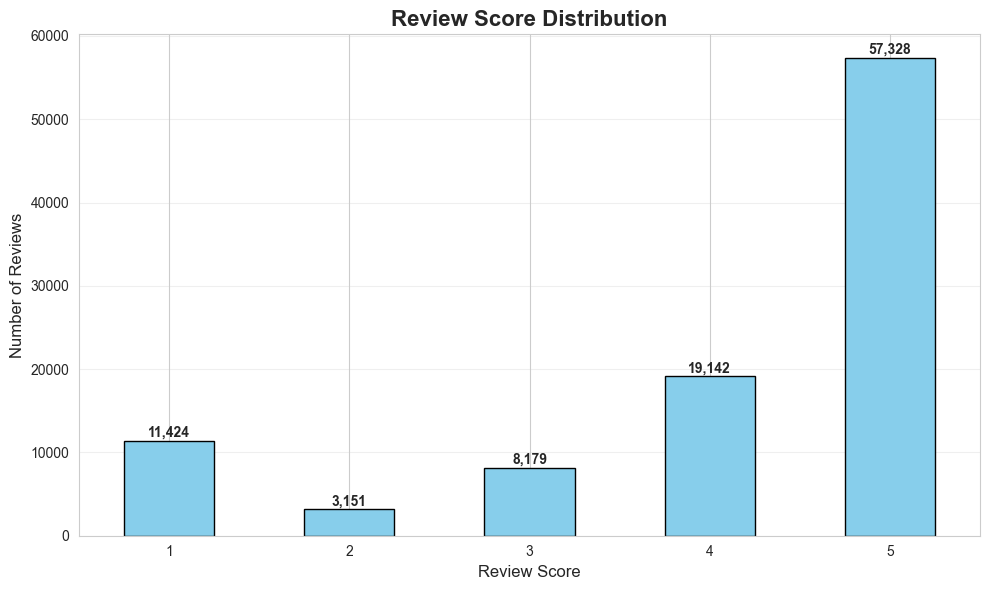


📝 Reviews with comments: 40,977 (41.3%)


In [11]:
# Cell 8: Explore Reviews Dataset
# ============================================================================
print("="*70)
print("⭐ REVIEWS DATASET")
print("="*70)

print("\n🔍 First 5 rows:")
display(reviews.head())

print("\n⭐ Review Score Distribution:")
review_dist = reviews['review_score'].value_counts().sort_index()
print(review_dist)

print("\n📊 Review Score Statistics:")
print(f"Average review score: {reviews['review_score'].mean():.2f}")
print(f"Median review score: {reviews['review_score'].median():.0f}")
print(f"Mode review score: {reviews['review_score'].mode()[0]:.0f}")

# Visualize review distribution
plt.figure(figsize=(10, 6))
review_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Review Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(review_dist.values):
    plt.text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('review_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📝 Reviews with comments: {reviews['review_comment_message'].notna().sum():,} ({reviews['review_comment_message'].notna().sum() / len(reviews) * 100:.1f}%)")

In [12]:
# Cell 9: Explore Category Translation
# ============================================================================
print("="*70)
print("🌐 CATEGORY TRANSLATION")
print("="*70)

print("\n🔍 First 10 rows:")
display(category_translation.head(10))

print(f"\nTotal categories with translation: {len(category_translation)}")

🌐 CATEGORY TRANSLATION

🔍 First 10 rows:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts



Total categories with translation: 71


In [13]:
# Cell 10: Understand Dataset Relationships
# ============================================================================
print("="*70)
print("🔗 DATASET RELATIONSHIPS & DATA QUALITY")
print("="*70)

print("\n1️⃣ Orders ↔ Customers")
print(f"   Unique customers in orders: {orders['customer_id'].nunique():,}")
print(f"   Total customers in customer table: {len(customers):,}")
print(f"   Match rate: {(orders['customer_id'].nunique() / len(customers)) * 100:.1f}%")

print("\n2️⃣ Orders ↔ Order Items")
print(f"   Unique orders in order_items: {order_items['order_id'].nunique():,}")
print(f"   Total orders: {len(orders):,}")
print(f"   Orders with items: {(order_items['order_id'].nunique() / len(orders)) * 100:.1f}%")
print(f"   Average items per order: {len(order_items) / order_items['order_id'].nunique():.2f}")

print("\n3️⃣ Order Items ↔ Products")
print(f"   Unique products in order_items: {order_items['product_id'].nunique():,}")
print(f"   Total products in product table: {len(products):,}")
print(f"   Products actually sold: {(order_items['product_id'].nunique() / len(products)) * 100:.1f}%")

print("\n4️⃣ Order Items ↔ Sellers")
print(f"   Unique sellers in order_items: {order_items['seller_id'].nunique():,}")
print(f"   Total sellers in seller table: {len(sellers):,}")
print(f"   Active sellers: {(order_items['seller_id'].nunique() / len(sellers)) * 100:.1f}%")

print("\n5️⃣ Orders ↔ Payments")
print(f"   Unique orders in payments: {payments['order_id'].nunique():,}")
print(f"   Total orders: {len(orders):,}")
print(f"   Orders with payment info: {(payments['order_id'].nunique() / len(orders)) * 100:.1f}%")

print("\n6️⃣ Orders ↔ Reviews")
print(f"   Unique orders in reviews: {reviews['order_id'].nunique():,}")
print(f"   Total orders: {len(orders):,}")
print(f"   Orders with reviews: {(reviews['order_id'].nunique() / len(orders)) * 100:.1f}%")

🔗 DATASET RELATIONSHIPS & DATA QUALITY

1️⃣ Orders ↔ Customers
   Unique customers in orders: 99,441
   Total customers in customer table: 99,441
   Match rate: 100.0%

2️⃣ Orders ↔ Order Items
   Unique orders in order_items: 98,666
   Total orders: 99,441
   Orders with items: 99.2%
   Average items per order: 1.14

3️⃣ Order Items ↔ Products
   Unique products in order_items: 32,951
   Total products in product table: 32,951
   Products actually sold: 100.0%

4️⃣ Order Items ↔ Sellers
   Unique sellers in order_items: 3,095
   Total sellers in seller table: 3,095
   Active sellers: 100.0%

5️⃣ Orders ↔ Payments
   Unique orders in payments: 99,440
   Total orders: 99,441
   Orders with payment info: 100.0%

6️⃣ Orders ↔ Reviews
   Unique orders in reviews: 98,673
   Total orders: 99,441
   Orders with reviews: 99.2%


In [14]:
# Cell 11: Date Range Analysis
# ============================================================================
print("="*70)
print("📅 DATE RANGE ANALYSIS")
print("="*70)

# Convert date columns
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

print(f"\n📅 Order Purchase Date Range:")
print(f"   Start: {orders['order_purchase_timestamp'].min()}")
print(f"   End: {orders['order_purchase_timestamp'].max()}")
print(f"   Duration: {(orders['order_purchase_timestamp'].max() - orders['order_purchase_timestamp'].min()).days} days")

print(f"\n📊 Orders by Year:")
orders['year'] = orders['order_purchase_timestamp'].dt.year
print(orders['year'].value_counts().sort_index())

print(f"\n📊 Orders by Month (2017-2018):")
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders['year_month'].value_counts().sort_index()
print(monthly_orders)

📅 DATE RANGE ANALYSIS

📅 Order Purchase Date Range:
   Start: 2016-09-04 21:15:19
   End: 2018-10-17 17:30:18
   Duration: 772 days

📊 Orders by Year:
year
2016      329
2017    45101
2018    54011
Name: count, dtype: int64

📊 Orders by Month (2017-2018):
year_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: count, dtype: int64


In [15]:
# Cell 12: Initial Insights Summary
# ============================================================================
print("="*70)
print("💡 INITIAL INSIGHTS & KEY FINDINGS")
print("="*70)

print("\n📊 BUSINESS OVERVIEW:")
print(f"   • Total Orders: {len(orders):,}")
print(f"   • Total Customers: {customers['customer_id'].nunique():,}")
print(f"   • Total Products: {order_items['product_id'].nunique():,}")
print(f"   • Total Sellers: {order_items['seller_id'].nunique():,}")
print(f"   • Date Range: {orders['order_purchase_timestamp'].min().date()} to {orders['order_purchase_timestamp'].max().date()}")

print("\n✅ DATA QUALITY:")
print(f"   • Delivered orders: {(orders['order_status'] == 'delivered').sum():,} ({(orders['order_status'] == 'delivered').sum() / len(orders) * 100:.1f}%)")
print(f"   • Orders with payment info: {(payments['order_id'].nunique() / len(orders)) * 100:.1f}%")
print(f"   • Orders with reviews: {(reviews['order_id'].nunique() / len(orders)) * 100:.1f}%")

print("\n💰 FINANCIAL OVERVIEW:")
total_revenue = payments['payment_value'].sum()
avg_order_value = payments.groupby('order_id')['payment_value'].sum().mean()
print(f"   • Total Revenue: R$ {total_revenue:,.2f}")
print(f"   • Average Order Value: R$ {avg_order_value:.2f}")

print("\n⭐ CUSTOMER SATISFACTION:")
print(f"   • Average Review Score: {reviews['review_score'].mean():.2f}/5.0")
print(f"   • 5-star reviews: {(reviews['review_score'] == 5).sum() / len(reviews) * 100:.1f}%")
print(f"   • 1-star reviews: {(reviews['review_score'] == 1).sum() / len(reviews) * 100:.1f}%")

print("\n🗺️ GEOGRAPHIC DISTRIBUTION:")
print(f"   • Top state: {customers['customer_state'].value_counts().index[0]} ({customers['customer_state'].value_counts().values[0]:,} customers)")
print(f"   • States covered: {customers['customer_state'].nunique()}")
print(f"   • Cities covered: {customers['customer_city'].nunique():,}")

print("\n📦 PRODUCT INSIGHTS:")
print(f"   • Average items per order: {len(order_items) / order_items['order_id'].nunique():.2f}")
print(f"   • Product categories: {products['product_category_name'].nunique()}")
print(f"   • Average product price: R$ {order_items['price'].mean():.2f}")

print("\n💳 PAYMENT INSIGHTS:")
print(f"   • Most popular payment: {payments['payment_type'].value_counts().index[0]}")
print(f"   • Average installments: {payments['payment_installments'].mean():.1f}")

💡 INITIAL INSIGHTS & KEY FINDINGS

📊 BUSINESS OVERVIEW:
   • Total Orders: 99,441
   • Total Customers: 99,441
   • Total Products: 32,951
   • Total Sellers: 3,095
   • Date Range: 2016-09-04 to 2018-10-17

✅ DATA QUALITY:
   • Delivered orders: 96,478 (97.0%)
   • Orders with payment info: 100.0%
   • Orders with reviews: 99.2%

💰 FINANCIAL OVERVIEW:
   • Total Revenue: R$ 16,008,872.12
   • Average Order Value: R$ 160.99

⭐ CUSTOMER SATISFACTION:
   • Average Review Score: 4.09/5.0
   • 5-star reviews: 57.8%
   • 1-star reviews: 11.5%

🗺️ GEOGRAPHIC DISTRIBUTION:
   • Top state: SP (41,746 customers)
   • States covered: 27
   • Cities covered: 4,119

📦 PRODUCT INSIGHTS:
   • Average items per order: 1.14
   • Product categories: 73
   • Average product price: R$ 120.65

💳 PAYMENT INSIGHTS:
   • Most popular payment: credit_card
   • Average installments: 2.9


In [16]:
# Cell 13: Save Initial Exploration Summary
# ============================================================================
print("\n💾 Saving exploration summary...")

# Create summary dictionary
summary = {
    'total_orders': len(orders),
    'total_customers': customers['customer_id'].nunique(),
    'total_products': order_items['product_id'].nunique(),
    'total_sellers': order_items['seller_id'].nunique(),
    'date_range_start': str(orders['order_purchase_timestamp'].min()),
    'date_range_end': str(orders['order_purchase_timestamp'].max()),
    'total_revenue': float(payments['payment_value'].sum()),
    'avg_order_value': float(payments.groupby('order_id')['payment_value'].sum().mean()),
    'avg_review_score': float(reviews['review_score'].mean()),
    'delivered_orders_pct': float((orders['order_status'] == 'delivered').sum() / len(orders) * 100)
}

# Save as JSON
import json
with open('initial_exploration_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("✅ Summary saved to 'initial_exploration_summary.json'")

print("\n" + "="*70)
print("🎉 INITIAL DATA EXPLORATION COMPLETE!")
print("="*70)
print("\n📝 NEXT STEPS:")
print("   1. Data Cleaning (handle missing values, outliers)")
print("   2. Create master dataset (join all tables)")
print("   3. Feature engineering")
print("   4. Exploratory Data Analysis (EDA)")
print("   5. Advanced analytics (RFM, Market Basket, Cohort)")
print("="*70)


💾 Saving exploration summary...
✅ Summary saved to 'initial_exploration_summary.json'

🎉 INITIAL DATA EXPLORATION COMPLETE!

📝 NEXT STEPS:
   1. Data Cleaning (handle missing values, outliers)
   2. Create master dataset (join all tables)
   3. Feature engineering
   4. Exploratory Data Analysis (EDA)
   5. Advanced analytics (RFM, Market Basket, Cohort)
